In [1]:
from sklearn.metrics import pairwise_distances 
from scipy.spatial.distance import cosine 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 

In [2]:
# load dataset 
movie = pd.read_csv('Movie.csv')
movie.head()

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5


In [3]:
# we have 8992 observations 
# and 3 columns 
movie.shape

(8992, 3)

In [4]:
# no duplicate observations found 
movie.duplicated().sum()

0

In [5]:
# there are no null values present in dataset 
movie.isnull().sum()

userId    0
movie     0
rating    0
dtype: int64

In [6]:
# No. of users > No. of movies
print(f'No. of unique users {movie["userId"].nunique()}')
print(f'No. of unique movies {movie["movie"].nunique()}')

No. of unique users 4081
No. of unique movies 10


### Since no. of items < no. of users, will make 'item-based recommendation engine'

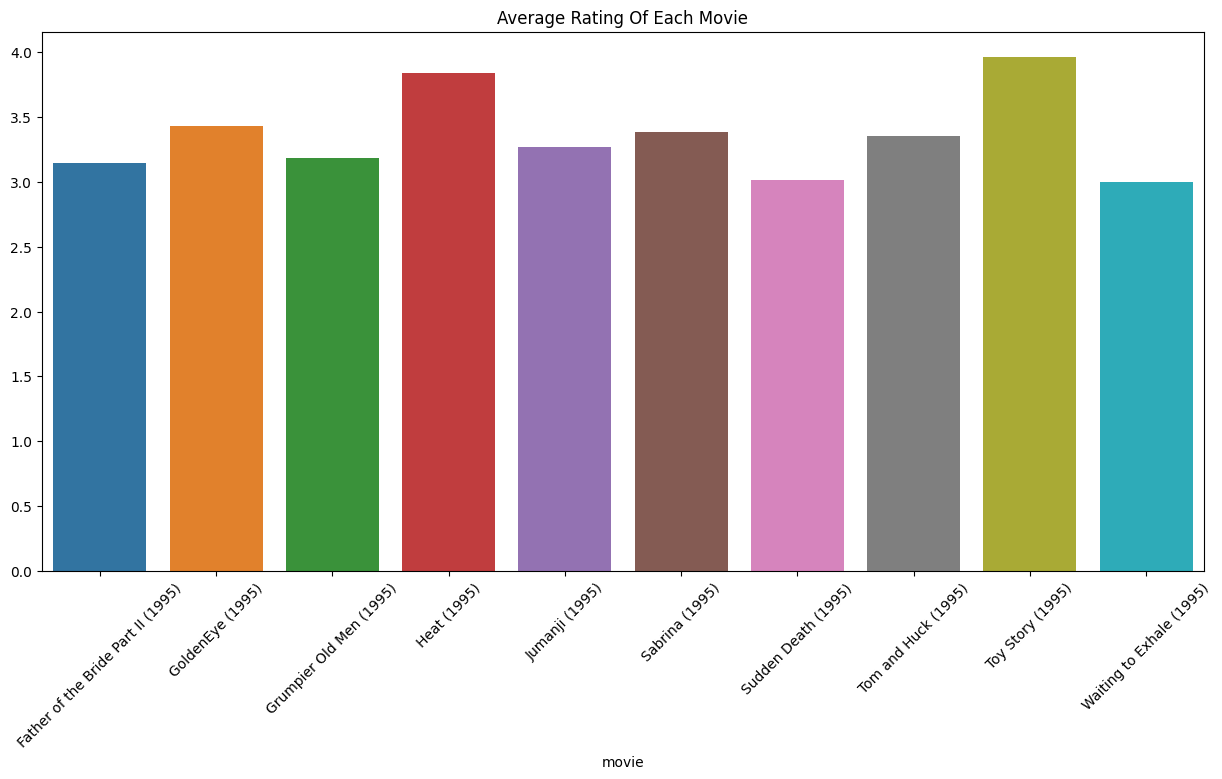

In [7]:
# Average rating of each movie 
n = movie[['movie','rating']].groupby('movie').mean()
plt.figure(figsize=(15,7))
sns.barplot(x=n.index,y=n.values.ravel())
plt.xticks(rotation=45)
plt.title('Average Rating Of Each Movie')
plt.show()

In [8]:
raw_copy = movie.copy(deep=True)
raw_copy['one'] = np.ones(len(raw_copy)) 

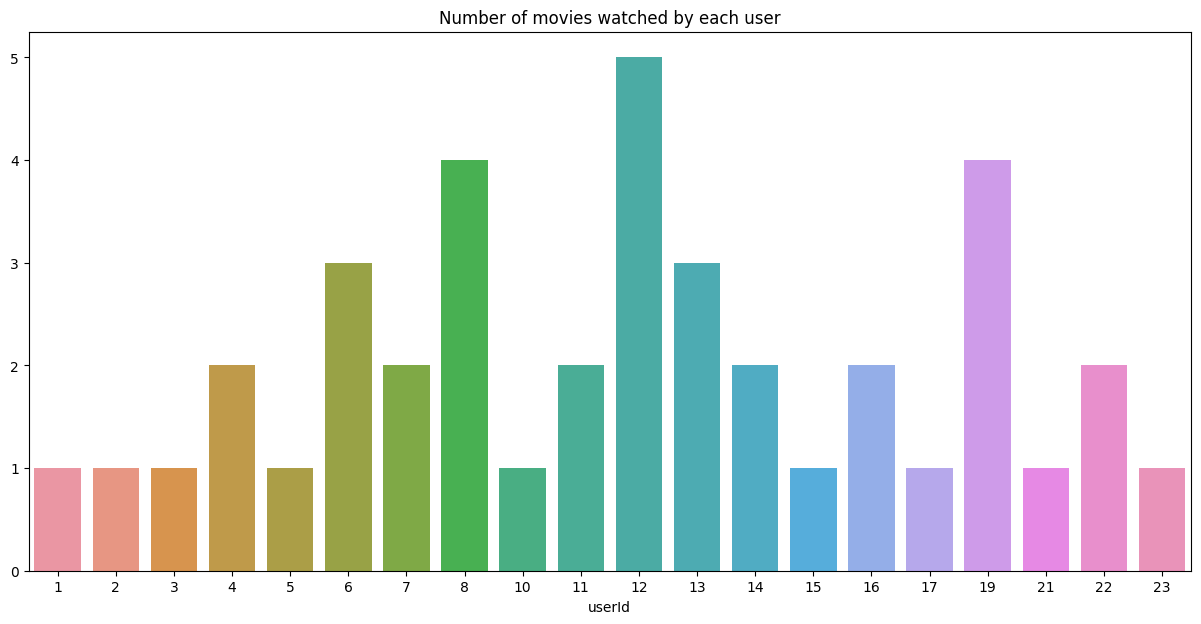

In [9]:
# number of movies watched by each user 
n = raw_copy[['userId','one']].groupby('userId').sum()
plt.figure(figsize=(15,7))
x = n[:20].index
y = n[:20].one.values.ravel()
sns.barplot(x=x,y=y)
plt.title('Number of movies watched by each user')
plt.show()

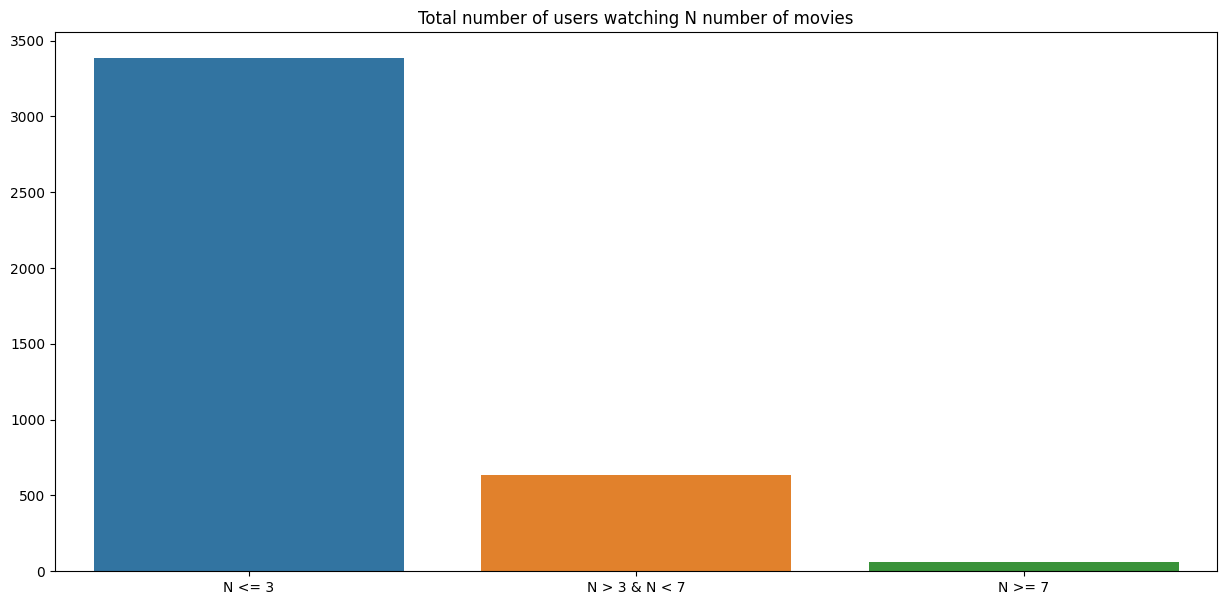

In [10]:
# Total number of users watching N number of movies 
plt.figure(figsize=(15,7))
sns.barplot(x=['N <= 3','N > 3 & N < 7','N >= 7'],
            y= [n[n.one <= 3].shape[0],
                n[(n.one > 3) & (n.one < 7)].shape[0],
                n[n.one >= 7].shape[0]])
plt.title('Total number of users watching N number of movies')
plt.show()

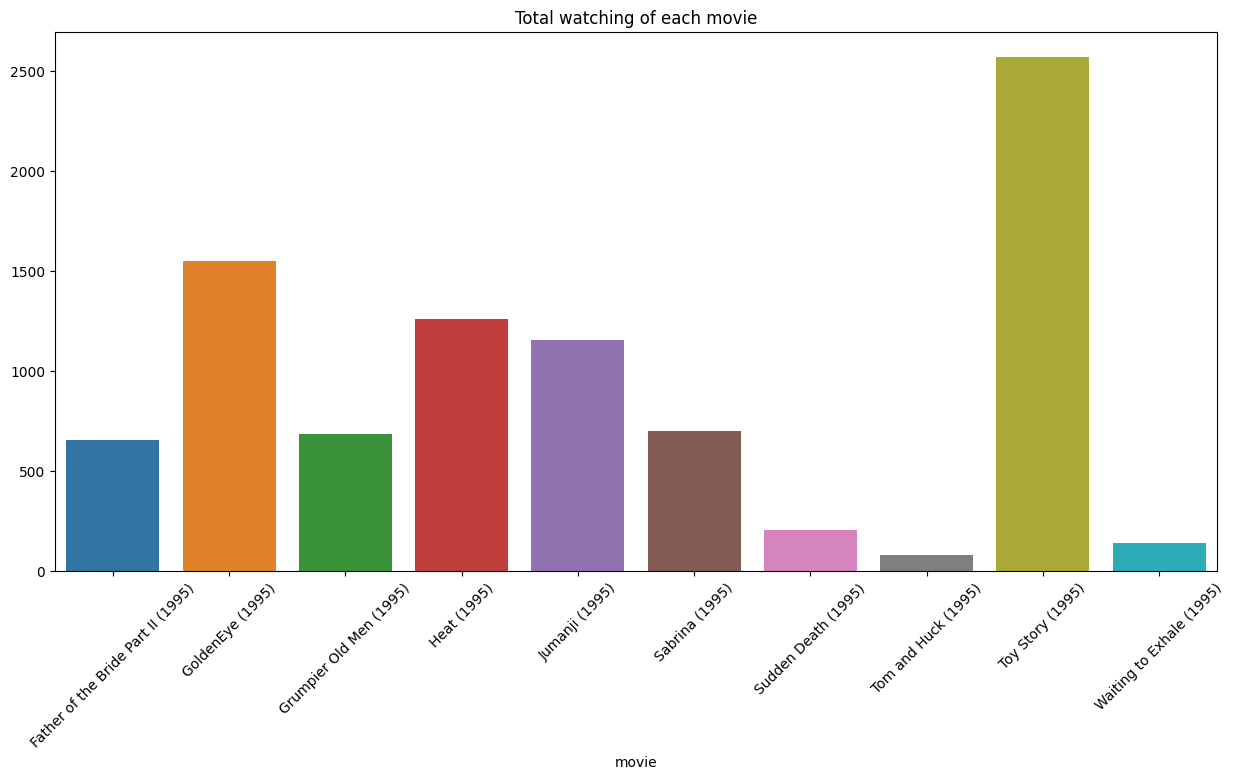

In [11]:
# Total watching of each movie 
n = raw_copy[['movie','one']].groupby('movie').sum()
plt.figure(figsize=(15,7))
sns.barplot(x=n.index,y=n.one.values.ravel())
plt.xticks(rotation=45)
plt.title('Total watching of each movie')
plt.show()

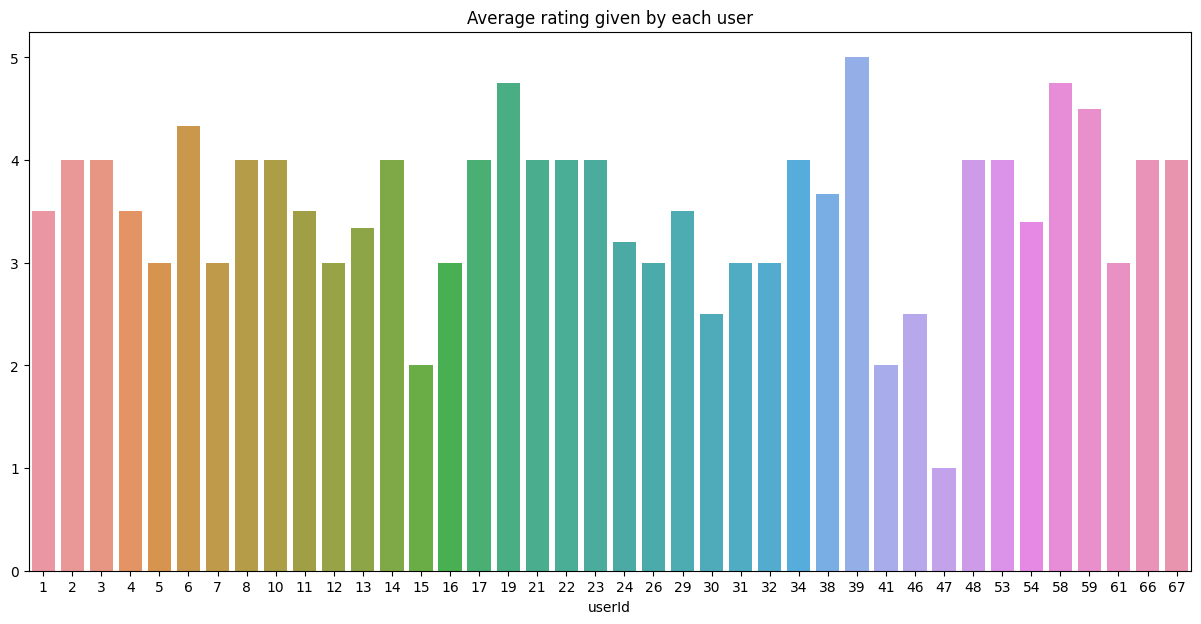

In [12]:
# Average rating given by each user 
n = movie[['userId','rating']].groupby(by='userId').mean()[:40]
plt.figure(figsize=(15,7))
sns.barplot(x=n.index,y=n.values.ravel())
plt.title('Average rating given by each user')
plt.show()

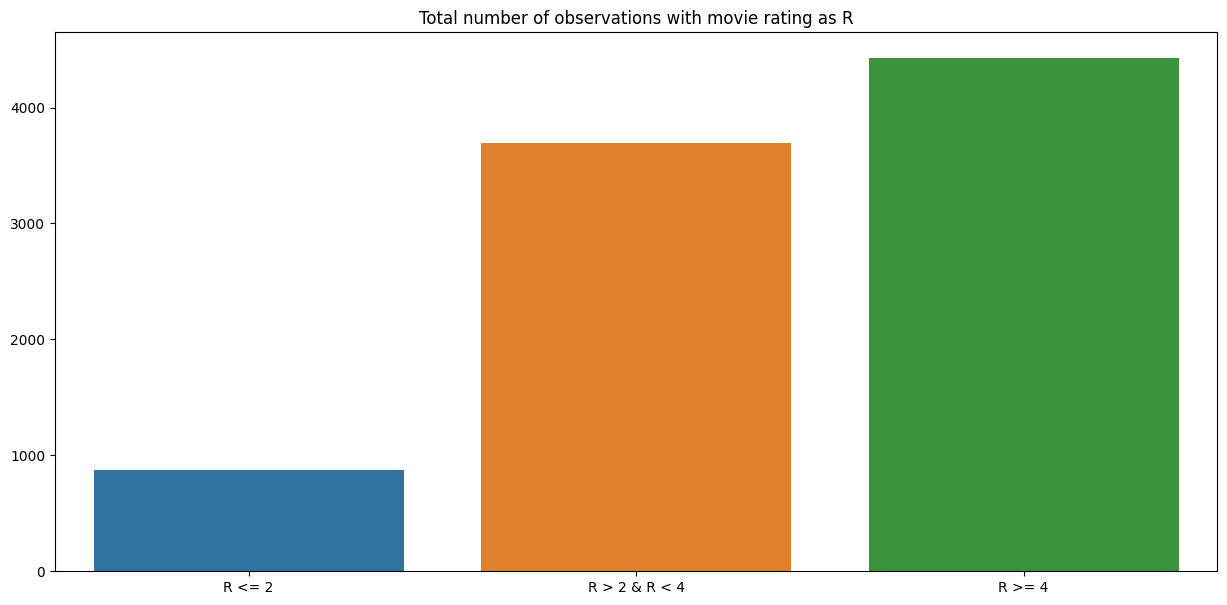

In [13]:
# Total number of observations with movie rating as R
plt.figure(figsize=(15,7))
sns.barplot(x=['R <= 2','R > 2 & R < 4','R >= 4'],
            y=[movie[movie.rating <= 2].shape[0],
               movie[(movie.rating > 2) & (movie.rating < 4)].shape[0],
               movie[movie.rating >= 4].shape[0]])
plt.title('Total number of observations with movie rating as R')
plt.show()

In [31]:
moviePivot = pd.pivot_table(movie,index='movie',
                            columns='userId',
                            values='rating')
# replace 'nan' values by 0
moviePivot.fillna(0,inplace=True)

In [32]:
moviePivot 

userId,1,2,3,4,5,6,7,8,10,11,...,7105,7107,7108,7110,7113,7115,7116,7117,7119,7120
movie,,,,,,,,,,,,,,,,,,,,,
Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,3.5,0.0,0.0,0.0
GoldenEye (1995),0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.5,...,2.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0
Grumpier Old Men (1995),0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
Heat (1995),0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0
Jumanji (1995),3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0
Sabrina (1995),0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0
Sudden Death (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Tom and Huck (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Toy Story (1995),0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,4.0,4.5,...,0.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,5.0,4.5


In [41]:
# calculating similarity between items
# using cosine similarity 
itemSim = 1 - pairwise_distances(moviePivot.values,
                                 metric='cosine')

In [42]:
# filling diagonal elements with 0 
# bcoz they have trivial values 
np.fill_diagonal(itemSim,0)

In [43]:
# making dataframe of array 
itemSim_df = pd.DataFrame(itemSim)

In [44]:
itemSim_df

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.215993,0.455662,0.247367,0.279804,0.395746,0.226458,0.162936,0.308638,0.163787
1,0.215993,0.000000,0.218198,0.397739,0.402260,0.221455,0.155255,0.119724,0.383486,0.128448
2,0.455662,0.218198,0.000000,0.290150,0.244710,0.390178,0.255387,0.143959,0.316911,0.156447
3,0.247367,0.397739,0.290150,0.000000,0.280088,0.262072,0.255629,0.062858,0.400116,0.124021
4,0.279804,0.402260,0.244710,0.280088,0.000000,0.246672,0.143286,0.196374,0.409982,0.147679
5,0.395746,0.221455,0.390178,0.262072,0.246672,0.000000,0.201556,0.164641,0.310434,0.189415
6,0.226458,0.155255,0.255387,0.255629,0.143286,0.201556,0.000000,0.097213,0.166793,0.151800
7,0.162936,0.119724,0.143959,0.062858,0.196374,0.164641,0.097213,0.000000,0.095521,0.148723
8,0.308638,0.383486,0.316911,0.400116,0.409982,0.310434,0.166793,0.095521,0.000000,0.138524
9,0.163787,0.128448,0.156447,0.124021,0.147679,0.189415,0.151800,0.148723,0.138524,0.000000


In [45]:
# assigning userId values to userSim_df index and columns 
itemSim_df.index = moviePivot.index
itemSim_df.columns = moviePivot.index

In [46]:
# userSim_df with userId as index and columns
itemSim_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
movie,,,,,,,,,,
Father of the Bride Part II (1995),0.000000,0.215993,0.455662,0.247367,0.279804,0.395746,0.226458,0.162936,0.308638,0.163787
GoldenEye (1995),0.215993,0.000000,0.218198,0.397739,0.402260,0.221455,0.155255,0.119724,0.383486,0.128448
Grumpier Old Men (1995),0.455662,0.218198,0.000000,0.290150,0.244710,0.390178,0.255387,0.143959,0.316911,0.156447
Heat (1995),0.247367,0.397739,0.290150,0.000000,0.280088,0.262072,0.255629,0.062858,0.400116,0.124021
Jumanji (1995),0.279804,0.402260,0.244710,0.280088,0.000000,0.246672,0.143286,0.196374,0.409982,0.147679
Sabrina (1995),0.395746,0.221455,0.390178,0.262072,0.246672,0.000000,0.201556,0.164641,0.310434,0.189415
Sudden Death (1995),0.226458,0.155255,0.255387,0.255629,0.143286,0.201556,0.000000,0.097213,0.166793,0.151800
Tom and Huck (1995),0.162936,0.119724,0.143959,0.062858,0.196374,0.164641,0.097213,0.000000,0.095521,0.148723
Toy Story (1995),0.308638,0.383486,0.316911,0.400116,0.409982,0.310434,0.166793,0.095521,0.000000,0.138524


In [47]:
# finding items with maximum similarity 
maxSim = itemSim_df.idxmax(axis=1)

In [49]:
pd.DataFrame(maxSim)

,0
movie,
Father of the Bride Part II (1995),Grumpier Old Men (1995)
GoldenEye (1995),Jumanji (1995)
Grumpier Old Men (1995),Father of the Bride Part II (1995)
Heat (1995),Toy Story (1995)
Jumanji (1995),Toy Story (1995)
Sabrina (1995),Father of the Bride Part II (1995)
Sudden Death (1995),Heat (1995)
Tom and Huck (1995),Jumanji (1995)
Toy Story (1995),Jumanji (1995)


In [61]:
# new dataframe to store [item1, item2, cosine]
y = []
for k in maxSim.index:
    y.append([k, maxSim[k],itemSim_df.loc[k][maxSim[k]]])
simDf = pd.DataFrame(y,columns=['item1','item2','cosine'])    
simDf.sort_values(by=['cosine'],ascending=False,inplace=True)
simDf

,item1,item2,cosine
0,Father of the Bride Part II (1995),Grumpier Old Men (1995),0.455662
2,Grumpier Old Men (1995),Father of the Bride Part II (1995),0.455662
4,Jumanji (1995),Toy Story (1995),0.409982
8,Toy Story (1995),Jumanji (1995),0.409982
1,GoldenEye (1995),Jumanji (1995),0.402260
3,Heat (1995),Toy Story (1995),0.400116
5,Sabrina (1995),Father of the Bride Part II (1995),0.395746
6,Sudden Death (1995),Heat (1995),0.255629
7,Tom and Huck (1995),Jumanji (1995),0.196374
9,Waiting to Exhale (1995),Sabrina (1995),0.189415


In [65]:
# items with cosine similarity more than 0.4
topSimItems = simDf[(simDf['cosine'] > 0.4) & (simDf['cosine'] < 1)].sort_values(by='cosine',
                                                         ascending=False)

### if cosine = 1, implies that  same user watched both the movies

In [66]:
topSimItems

,item1,item2,cosine
0,Father of the Bride Part II (1995),Grumpier Old Men (1995),0.455662
2,Grumpier Old Men (1995),Father of the Bride Part II (1995),0.455662
4,Jumanji (1995),Toy Story (1995),0.409982
8,Toy Story (1995),Jumanji (1995),0.409982
1,GoldenEye (1995),Jumanji (1995),0.402260
3,Heat (1995),Toy Story (1995),0.400116


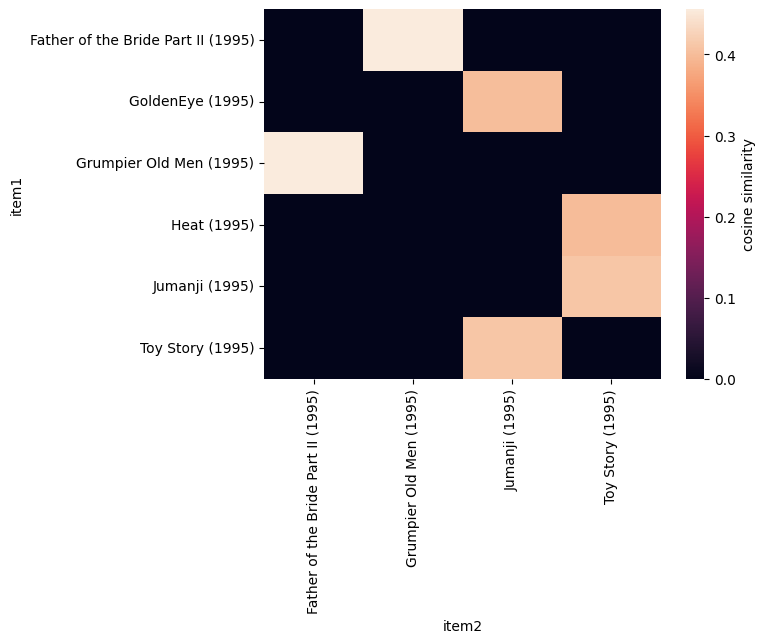

In [69]:
# visualizing similarity between item1 and item2 using heatmap 
n = pd.pivot_table(topSimItems, index='item1',
                    columns='item2',
                    values='cosine')
n.fillna(0,inplace=True)
sns.heatmap(n,cbar_kws={'label':'cosine similarity'})
plt.show()

In [70]:
topSimItems

,item1,item2,cosine
0,Father of the Bride Part II (1995),Grumpier Old Men (1995),0.455662
2,Grumpier Old Men (1995),Father of the Bride Part II (1995),0.455662
4,Jumanji (1995),Toy Story (1995),0.409982
8,Toy Story (1995),Jumanji (1995),0.409982
1,GoldenEye (1995),Jumanji (1995),0.402260
3,Heat (1995),Toy Story (1995),0.400116


In [73]:
# recommend movies to users 
user_recom = []
for j in topSimItems.index:
    item1 = topSimItems.loc[j][0]
    item2 = topSimItems.loc[j][1]
    k = movie[(movie['movie'] == item1) | (movie['movie'] == item2)]
    a = set(k[k['movie'] == item1]['userId'].values)
    b = set(k[k['movie'] == item2]['userId'].values)
    if a-b:
        user_recom += [[item2,i] for i in a-b]
    else :
        pass

In [75]:
recomUser = pd.DataFrame(user_recom,
                         columns=['movie','recommend to'])

In [77]:
# movie recommendations given by recommendation engine 
Recommendation = pd.pivot_table(recomUser,index=['movie','recommend to']) 

In [89]:
m = recomUser.movie.unique()

In [102]:
# recommend 'Grumpier Old Men' to following top 5 users 
Recommendation[Recommendation.index.get_level_values(0) == m[0]].head()

Empty DataFrame
Columns: []
Index: [(Grumpier Old Men (1995), 24), (Grumpier Old Men (1995), 30), (Grumpier Old Men (1995), 46), (Grumpier Old Men (1995), 54), (Grumpier Old Men (1995), 69)]

In [103]:
# recommend 'Father of the Bride Part II' to following top 5 users 
Recommendation[Recommendation.index.get_level_values(0) == m[1]].head()

Empty DataFrame
Columns: []
Index: [(Father of the Bride Part II (1995), 2), (Father of the Bride Part II (1995), 6), (Father of the Bride Part II (1995), 7), (Father of the Bride Part II (1995), 8), (Father of the Bride Part II (1995), 19)]

In [104]:
# recommend 'Toy Story' to following top 5 users 
Recommendation[Recommendation.index.get_level_values(0) == m[2]].head()

Empty DataFrame
Columns: []
Index: [(Toy Story (1995), 1), (Toy Story (1995), 4), (Toy Story (1995), 5), (Toy Story (1995), 17), (Toy Story (1995), 21)]

In [105]:
# recommend 'Jumanji' to following top 5 users 
Recommendation[Recommendation.index.get_level_values(0) == m[3]].head()

Empty DataFrame
Columns: []
Index: [(Jumanji (1995), 3), (Jumanji (1995), 4), (Jumanji (1995), 6), (Jumanji (1995), 8), (Jumanji (1995), 10)]